# Titanic Project

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.we will implement several conditional predictions and answer the questions.

## Introduction:

In this project, we aim to predict the survival of passengers aboard the Titanic using historical data. We'll explore relationships between features such as gender, age, and class to improve our prediction accuracy. By the end of this project, we'll compare simple models and more complex ones to see which features contribute the most to survival predictions.

### Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.


In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb


# Load the dataset
full_data = pd.read_csv('titanic_data.csv')
print(full_data.shape)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

First, we will drop two columns:
- Cabin: It contains many null values and isn't considered important for this analysis.
- Embarked: Since the Titanic sank after three embarkations, the specific embarkation point of passengers is not significant to the outcome.

In [7]:
full_data=full_data.drop(columns=["Cabin","Embarked"])
display(full_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [8]:
full_data.isnull().any() #before cleaning 
# but null values in age must be replaced becuase this important column 
full_data=full_data.fillna(full_data.mean(numeric_only=True))  #replace avrage age for null values
full_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
dtype: bool

In [9]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived'] #output or target
data = full_data.drop('Survived', axis = 1) #features

# Show the new dataset with 'Survived' removed
display(data.head())
print(type(outcomes))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


<class 'pandas.core.series.Series'>


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  


In [10]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of "+str((truth == pred).mean()*100)+"%" 
        #calc mean as sum zeros and ones over count of them , beause it similar to sum the ones over number of all of them
    
    else:
        return "Number of predictions does not match number of outcomes!"
    

predictions = pd.Series(np.ones(5, dtype = int))#fake pred for trial
output=accuracy_score(outcomes[:5], predictions) # compare the fisrt 5 real values of survied column with your pred to accuracy?
print(output)

Predictions have an accuracy of 60.0%


### (truth)    :  (pred)     : (truth == pred)      
####   1       :       1          :              T
####    1        :         1          :              T
####    0          :       0           :             T
####    1          :       0         :               F
####    0         :        1              :          F

### (truth == pred).mean() =3/5=0.6   * 100 =60%

# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive. , it is called naive prediction(you said whole 0 or 1 then check the prediction)

In [11]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for i in range(data.shape[0]):#len of rows
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data) # now i have ds equvelant to outcomes in length but it has zeros
predictions

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Length: 891, dtype: int64

#### Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

**let's check the acuracy**

In [12]:
print(accuracy_score(outcomes, predictions))
# so this naive prediction give you 62% accuracy with assumption that the all passengers not survived

Predictions have an accuracy of 61.61616161616161%


***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using matplot or seaborn

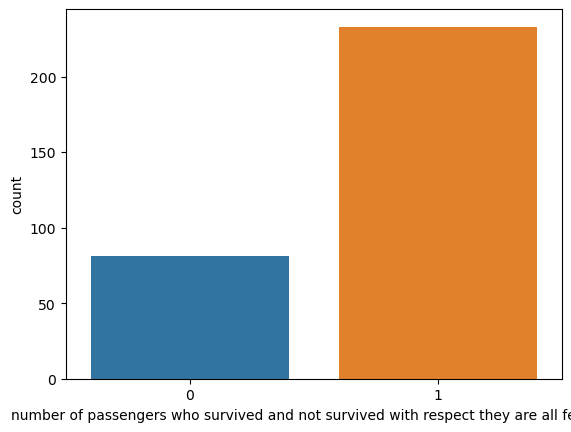

In [13]:
# we will find a relationship between feature "sex" and  survival rate
female_data=full_data[full_data["Sex"] == "female"]
sb.countplot(data=female_data,x='Survived');
plt.xlabel("number of passengers who survived and not survived with respect they are all females");

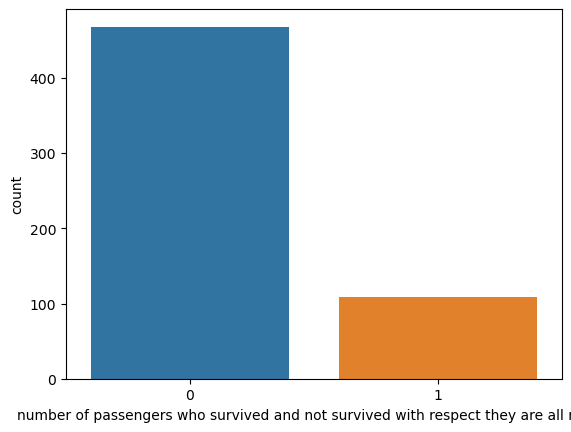

In [14]:
male_data=full_data[full_data["Sex"] == "male"]
sb.countplot(data=male_data,x='Survived');
plt.xlabel("number of passengers who survived and not survived with respect they are all males");

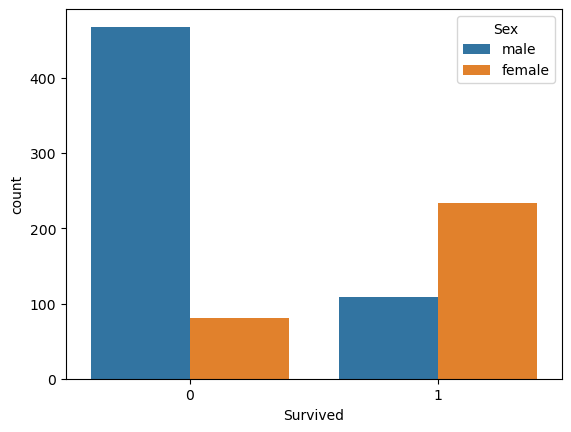

In [15]:
sb.countplot(data=full_data,x='Survived',hue="Sex");

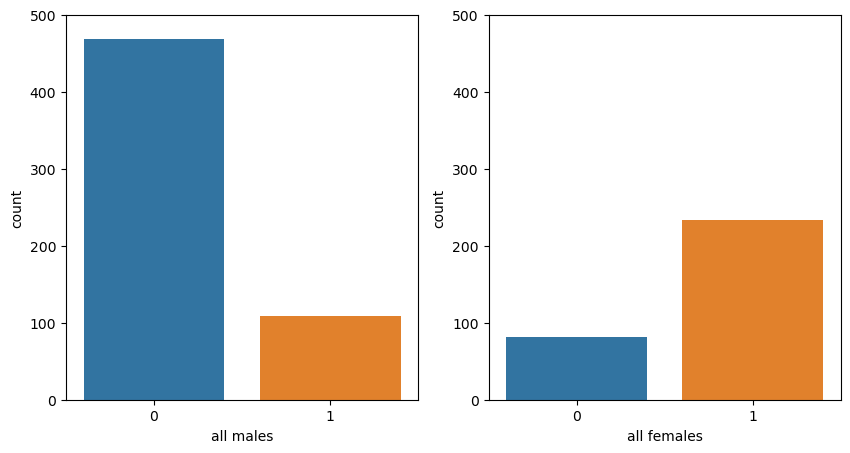

In [16]:
# by another way

plt.figure(figsize = [10, 5])
# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.countplot(data=male_data,x='Survived')
ylabelm=np.arange(0,600,100) # as a variable
# try to comment this here and in the 2nd plot and you will notice the top num in y-axis different so we detect it manually
plt.yticks(ylabelm); 
plt.xlabel("all males");
plt.subplot(1, 2, 2)
sb.countplot(data=female_data,x='Survived');
ylabelf=np.arange(0,600,100)
plt.yticks(ylabelf);
plt.xlabel("all females");

In [17]:
def predictions_11(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for i in range(0,data.shape[0]):
        

        if data.loc[i,"Sex"]=="female" :
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions11 = predictions_11(data)

In [14]:
print(accuracy_score(outcomes, predictions11)) # do you notice now accuracy is 78%

Predictions have an accuracy of 78.67564534231201%


Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  

***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the **matplot and seaborn**. This time only passengers with the **Sex** 'male' will be included.  .

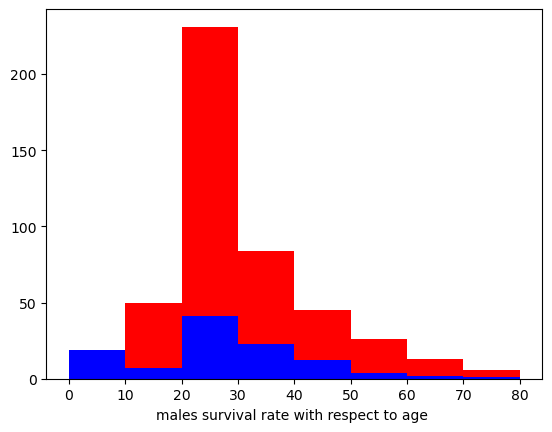

In [19]:
male_data_nsurv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 0)] # red
male_data_surv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 1)]  # blue
bins=np.arange(0,full_data['Age'].max()+10,10)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red")
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue")
plt.xlabel("males survival rate with respect to age ");

#if we notice the output , you will notice red more than blue in all ages in males except the age 0 to 10 ,they are survived so that mean the children surviving was a priority 

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  

In [18]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for i, passenger in data.iterrows():
        if (passenger["Sex"] == "female") or (passenger["Sex"] == "male" and passenger["Age"] < 7):
            predictions.append(1)
        else:
            predictions.append(0)
            
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)


* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived? 


In [20]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.57351290684625%


***
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. we can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.


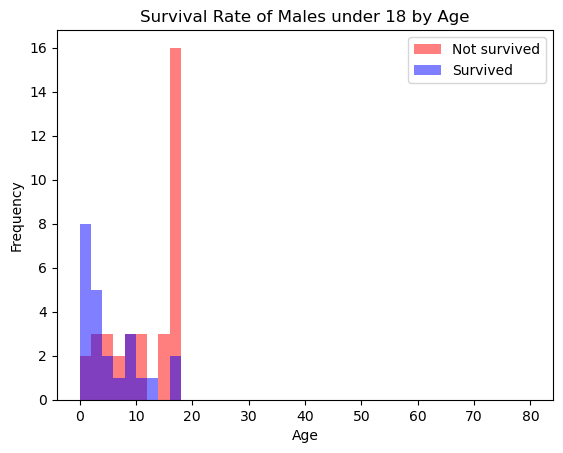

In [21]:
# todo: graph the histogram for the age of males (survivied in blue and not survivied in red) with respect age < 18
male_data_nsurv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 0)& (full_data["Age"] <18)] # red
male_data_surv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 1)& (full_data["Age"] <18)]  # blue
bins=np.arange(0,full_data['Age'].max()+2,2)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red",alpha=0.5,label="Not survived")
# Alpha parameter -> This makes the bars semi-transparent, so overlapping areas between the two histograms are visible.
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue",alpha=0.5,label="Survived")
plt.xlabel("males survival rate with respect to age ");
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Survival Rate of Males under 18 by Age")
plt.legend()
plt.show()
# between 10 and 18 the majority also for not survived , so age<18 not significant in our predection,but we can noticethat age specifically less than 7 the majority survived

In [22]:
full_data["Parch"].unique() 

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

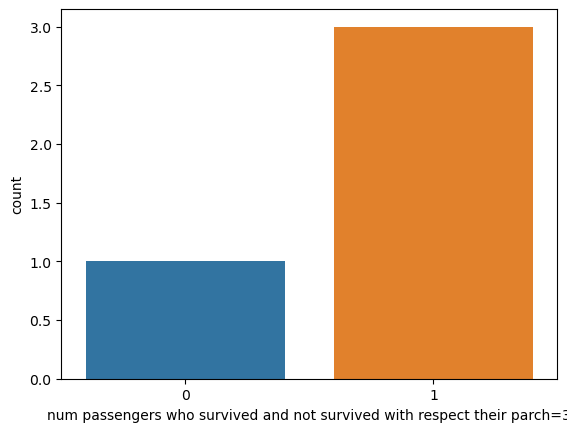

In [23]:
# let's check the role of Parch in prediction
# graph a chart for survival and not survival with respect they are females and no of Parch ==3
female_data=full_data[(full_data["Sex"] == "female")&(full_data["Parch"]==3)]
sb.countplot(data=female_data,x='Survived');
plt.xlabel("num passengers who survived and not survived with respect their parch=3");

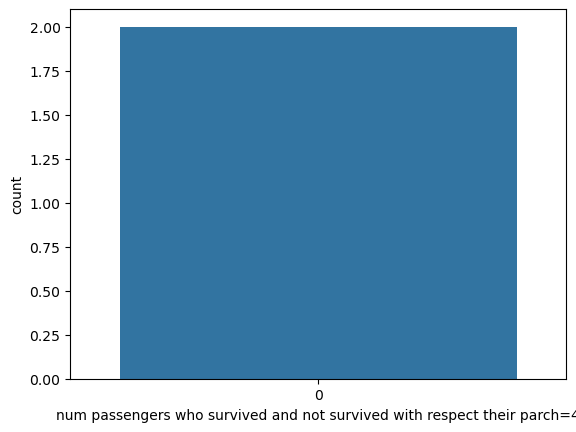

In [24]:
# let's check the role of Parch in prediction
#graph a chart for survival and not survival  with respect they are females and no of Parch ==3
female_data=full_data[(full_data["Sex"] == "female")&(full_data["Parch"]==4)]
sb.countplot(data=female_data,x='Survived');
plt.xlabel("num passengers who survived and not survived with respect their parch=4");

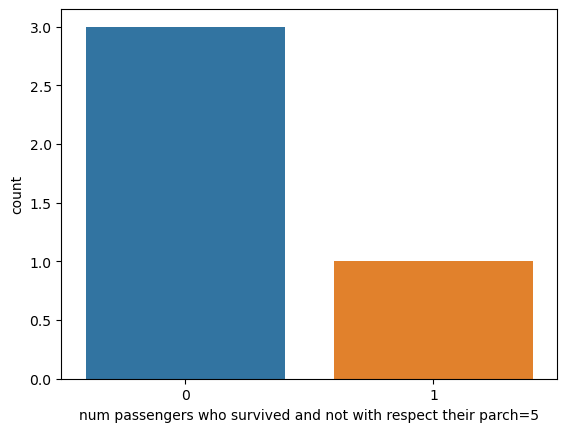

In [25]:
#graph a chart for survival and not survival  with respect they are females and no of Parch ==5
female_data=full_data[(full_data["Sex"] == "female")&(full_data["Parch"]==5)]
sb.countplot(data=female_data,x='Survived');
plt.xlabel("num passengers who survived and not with respect their parch=5");

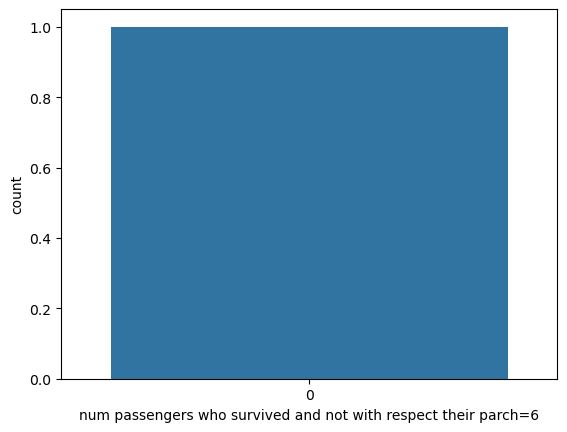

In [26]:
#graph a chart for survival and not survival  with respect they are females and no of Parch ==6
male_data=full_data[(full_data["Sex"] == "female")&(full_data["Parch"]==6)]
sb.countplot(data=male_data,x='Survived');
plt.xlabel("num passengers who survived and not with respect their parch=6");

#### Notes
here we notice that the females that has parch 3 they has the priority for survive , beaucse in chart the survive bar is higher 
but the parch 4,5,6 the majority are not survived and in 4 and 6 parch there are no survived at all 

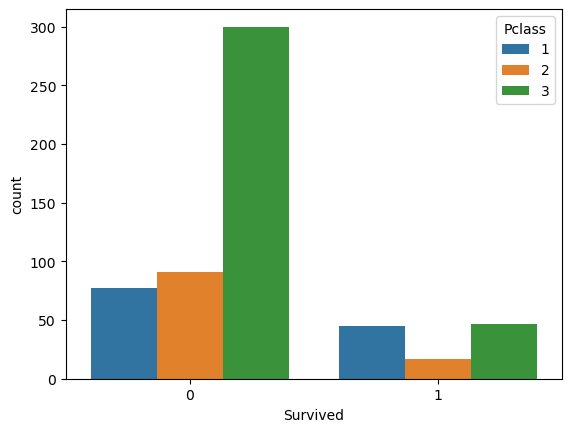

In [26]:
# graph a chart for survival and not survival  with respect they are males and Pclass ==1
# graph a chart for survival and not survival  with respect they are males and Pclass ==2
# graph a chart for survival and not survival  with respect they are males and Pclass ==3
male_data=full_data[full_data["Sex"] == "male"]
sb.countplot(data=male_data,x='Survived',hue="Pclass");

In [28]:
# if we notice the previous chart , in the 3 classes the majority not survived but now we will calc the percentage of survived
nclass=[1,2,3]
for i in range(3):
    male_c1_surv=full_data[(full_data["Sex"] == "male")&(full_data["Pclass"]==nclass[i])&(full_data["Survived"]==1)]
    male_c1=male_data=full_data[(full_data["Sex"] == "male")&(full_data["Pclass"]==nclass[i])]
    percentage_of_surv=(male_c1_surv.shape[0] / male_c1.shape[0]) * 100
    print(round(percentage_of_surv,2),"% survived in pclass ",nclass[i])

36.89 % survived in pclass  1
15.74 % survived in pclass  2
13.54 % survived in pclass  3


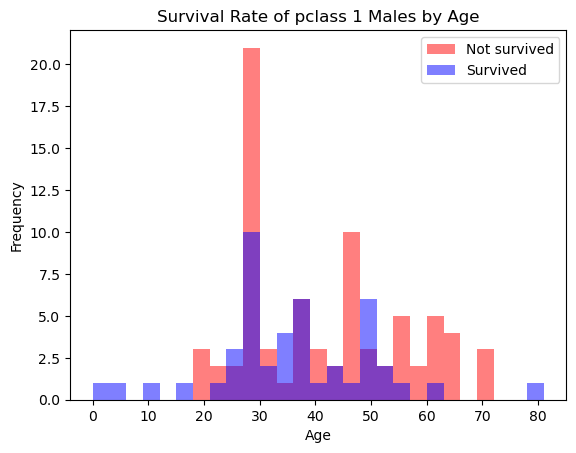

In [29]:
# graph the histogram  for the age of males (survivied in blue and not survivied in red) with respect  Pclass=1
male_data_nsurv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 0)&(full_data["Pclass"]==1)] # red
male_data_surv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 1)&(full_data["Pclass"]==1)]  # blue

bins=np.arange(0,full_data['Age'].max()+3,3)

plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red",alpha=0.5,label="Not survived")
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue",alpha=0.5,label="Survived")

plt.xlabel("males survival rate with respect to age ");
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Survival Rate of pclass 1 Males by Age")


plt.legend()
plt.show()


In [40]:
def predictions_3(data):
    
    predictions = []
    for i, passenger in data.iterrows():
        if ((passenger["Sex"] == "female") and (passenger["Parch"]<4)) or \
           ((passenger["Sex"] == "male") and (passenger["Age"]<7))or \
           ((passenger["Sex"] == "male") and (passenger["Pclass"] == 1) and ((29 > passenger["Age"] > 24) or ( 39 >passenger["Age"] > 33) or (18 >passenger["Age"])) ):
            predictions.append(1)  
        else:
            predictions.append(0)  
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

**let's see the accuracy now**

In [42]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.3692480359147%


# thanks for your attention